# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## 1. Collect the Data

In [1]:
import pandas as pd
import numpy as np
heroes = pd.read_csv("superheroes_power_matrix.csv")
heroes = heroes.drop(columns = ['Intelligence','Durability'])
heroes = heroes.merge(pd.read_csv('marvel_characters_info.csv')[['Name','Publisher']], how='left', on='Name')
heroes = heroes.merge(pd.read_csv('charcters_stats.csv'), how='left', on='Name')

heroes = heroes[heroes.Publisher == 'Marvel Comics']
heroes.head()

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Publisher,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
1,A-Bomb,False,True,False,False,False,False,False,False,False,...,False,Marvel Comics,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,Marvel Comics,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0
5,Abraxas,False,False,False,True,False,False,False,True,False,...,False,Marvel Comics,bad,88.0,100.0,83.0,99.0,100.0,56.0,526.0
6,Absorbing Man,False,False,False,False,True,False,True,False,False,...,False,Marvel Comics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Agent Bob,False,False,False,False,False,True,False,False,False,...,False,Marvel Comics,good,10.0,8.0,13.0,5.0,5.0,20.0,61.0


## 2. Clean the Data

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
heroes.isnull().sum()[heroes.isnull().sum() > 0 ]

Alignment       41
Intelligence    39
Strength        39
Speed           39
Durability      39
Power           39
Combat          39
Total           39
dtype: int64

In [4]:
heroes.dropna(subset=['Alignment'],inplace=True)
heroes = heroes[heroes.Alignment.isin(['good','bad'])]

In [8]:
stats = heroes.drop(columns=['Name','Alignment','Publisher']).sum()
drop_stats = stats[stats < 10].index

In [11]:
heroes.drop(columns = list(drop_stats),inplace=True)
heroes.drop(columns = ['Publisher','Total'],inplace=True)
heroes

,Name,Agility,Accelerated Healing,Dimensional Awareness,Cold Resistance,Stealth,Energy Absorption,Flight,Danger Sense,Marksmanship,...,Vision - Infrared,Vision - Thermal,Web Creation,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
1,A-Bomb,False,True,False,False,False,False,False,False,False,...,False,False,False,good,38.0,100.0,17.0,80.0,17.0,64.0
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,bad,63.0,80.0,53.0,90.0,55.0,95.0
5,Abraxas,False,False,True,False,False,False,True,False,False,...,False,False,False,bad,88.0,100.0,83.0,99.0,100.0,56.0
9,Agent Bob,False,False,False,False,True,False,False,False,False,...,False,False,False,good,10.0,8.0,13.0,5.0,5.0,20.0
10,Agent Zero,False,False,False,False,False,True,False,False,False,...,False,False,False,good,75.0,28.0,38.0,80.0,72.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,X-23,True,True,False,False,True,False,False,False,True,...,False,False,False,good,75.0,24.0,35.0,90.0,27.0,85.0
679,X-Man,False,False,False,False,False,False,True,False,False,...,False,False,False,good,88.0,53.0,53.0,95.0,92.0,84.0
680,Yellowjacket,False,False,False,False,False,False,False,False,False,...,False,False,False,good,88.0,10.0,12.0,28.0,12.0,14.0
681,Yellowjacket II,False,False,False,False,False,False,True,False,False,...,False,False,False,good,50.0,10.0,35.0,28.0,31.0,28.0


## 3. Explore the Data

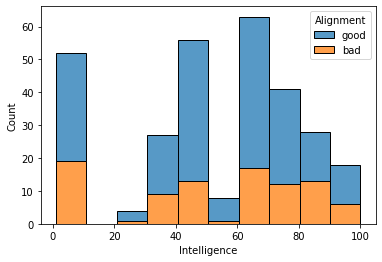

In [12]:
ax = sns.histplot(data = heroes, x = 'Intelligence', hue='Alignment', multiple='stack')

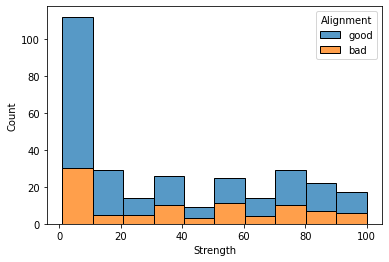

In [13]:
ax = sns.histplot(data = heroes, x = 'Strength', hue='Alignment', multiple='stack')

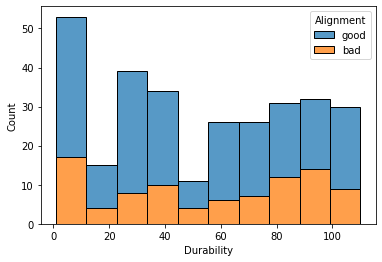

In [14]:
ax = sns.histplot(data = heroes, x = 'Durability', hue='Alignment', multiple='stack')

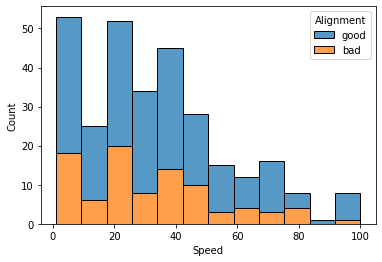

In [15]:
ax = sns.histplot(data = heroes, x = 'Speed', hue='Alignment', multiple='stack')

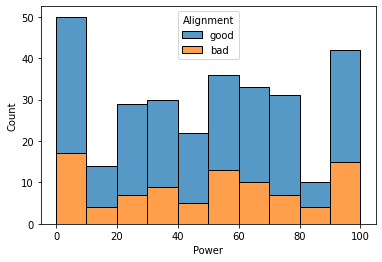

In [16]:
ax = sns.histplot(data = heroes, x = 'Power', hue='Alignment', multiple='stack')

## 3. Prepare the Data

In [17]:
heroes = heroes.reset_index()
heroes.drop(columns=['index'],inplace=True)

In [18]:
y = heroes['Alignment']

In [19]:
X = heroes.drop(columns=['Name','Alignment'])

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.4,
                                                    random_state = 42) 

In [21]:
X_train.shape, X_test.shape

((118, 66), (179, 66))

## 4. Train and Evaluate the KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
model = classifier.fit(X_train,y_train)
model.score(X_test,y_test)

0.664804469273743

## Tune Parameters

In [23]:
grid = {'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute'],
        'n_neighbors': np.arange(3,31,2),
        'metric':['euclidean','jensenshannon','correlation','braycurtis','cityblock']}

estimator = KNeighborsClassifier()
gc = GridSearchCV(estimator=estimator,param_grid=grid)
gc.fit(X_train, y_train)
gc.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
980 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 207, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.10/li

KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

In [24]:
classifier = KNeighborsClassifier(n_neighbors=19, metric='euclidean',weights='distance')
model = classifier.fit(X_train,y_train)
model.score(X_test,y_test)

0.6815642458100558

In [25]:
ca_test = heroes.loc[heroes.Name == 'Captain America'].drop(columns=['Name','Alignment'])
model.predict(ca_test)

array(['good'], dtype=object)

In [26]:
mag_test = heroes.loc[heroes.Name == 'Magneto'].drop(columns=['Name','Alignment'])
model.predict(mag_test)

array(['good'], dtype=object)

In [27]:
heroes.loc[heroes.Name == "Magneto"]

,Name,Agility,Accelerated Healing,Dimensional Awareness,Cold Resistance,Stealth,Energy Absorption,Flight,Danger Sense,Marksmanship,...,Vision - Infrared,Vision - Thermal,Web Creation,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
168,Magneto,False,False,False,False,False,False,True,False,False,...,False,False,False,bad,88.0,80.0,27.0,84.0,91.0,80.0


In [28]:
than_test = heroes.loc[heroes.Name == 'Thanos'].drop(columns=['Name','Alignment'])
model.predict(than_test)

array(['bad'], dtype=object)

In [29]:
red_test = heroes.loc[heroes.Name == 'Red Skull'].drop(columns=['Name','Alignment'])
model.predict(red_test)

array(['bad'], dtype=object)

In [30]:
model.predict(heroes.loc[heroes.Name == 'Scarlet Witch'].drop(columns=['Name','Alignment']))[0]

'good'

In [31]:
heroes.loc[heroes.Name == "Scarlet Witch"]

,Name,Agility,Accelerated Healing,Dimensional Awareness,Cold Resistance,Stealth,Energy Absorption,Flight,Danger Sense,Marksmanship,...,Vision - Infrared,Vision - Thermal,Web Creation,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
222,Scarlet Witch,True,False,True,False,False,False,True,False,False,...,False,False,False,bad,88.0,10.0,23.0,42.0,67.0,28.0


In [32]:
good_villains = []

villains = heroes[heroes.Alignment == 'bad'].Name.unique()
for villain in villains: 
    result=model.predict(heroes.loc[heroes.Name == villain].drop(columns=['Name','Alignment']))[0]
    if result == "good":
        good_villains.append(villain)

print(good_villains)


['Abraxas', 'Air-Walker', 'Ammo', 'Annihilus', 'Apocalypse', 'Arclight', 'Big Man', 'Bird-Man II', 'Black Abbott', 'Blackout', 'Bloodaxe', 'Bullseye', 'Callisto', 'Carnage', 'Demogoblin', 'Destroyer', 'Doctor Doom', 'Dormammu', 'Ego', 'Evilhawk', 'Fallen One II', 'Frenzy', 'Goblin Queen', 'Green Goblin', 'Green Goblin II', 'Hobgoblin', 'Iron Monger', 'Klaw', 'Kraven the Hunter', 'Lady Bullseye', 'Leader', 'Living Brain', 'Magneto', 'Mandarin', 'Mephisto', 'Mister Sinister', 'Molten Man', 'Morlun', 'Moses Magnum', 'Proto-Goblin', 'Razor-Fist II', 'Rhino', 'Scarlet Witch', 'Scorpia', 'Scorpion', 'Siryn', 'Spider-Woman IV', 'Tiger Shark', 'Tinkerer', 'Venom', 'Venom II', 'Venom III', 'Vulture', 'Walrus']


In [33]:
len(good_villains)/len(villains)

0.6

In [34]:
bad_heroes = []

heroes_list = heroes[heroes.Alignment == 'good'].Name.unique()
for hero in heroes_list: 
    result=model.predict(heroes.loc[heroes.Name == hero].drop(columns=['Name','Alignment']))[0]
    if result == "bad":
        bad_heroes.append(hero)

print(bad_heroes)


['Cerebra', 'Iceman', 'Shadow King']


In [35]:
len(bad_heroes)/len(heroes_list)

0.015151515151515152

{}